# Getting Started with PANDAS

# **T. Prathima**, Assistant Professor, Dept. of IT, CBIT(A)

Reference:
Python for Data Analysis DATA WRANGLING WITH PANDAS, NUMPY, AND IPYTHON
Author: Wes McKinney

In [6]:
import pandas as pd

In [7]:
from pandas import Series, DataFrame

• Data structures with labeled axes supporting automatic or explicit data alignment.
This prevents common errors resulting from misaligned data and working with
differently-indexed data coming from different sources.
• Integrated time series functionality.
• The same data structures handle both time series data and non-time series data.
• Arithmetic operations and reductions (like summing across an axis) would pass
on the metadata (axis labels).
• Flexible handling of missing data.
• Merge and other relational operations found in popular database databases (SQLbased, for example).

In [8]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Introduction to pandas Data Structures

### Series

To get started with pandas, you will need to get comfortable with its two workhorse data structures:
# **Series and DataFrame. **
While they are not a universal solution for every problem, they provide a solid, easy-to-use basis for most applications.

In [9]:
#A Series is a one-dimensional array-like object containing an array of data (of any
#NumPy data type) and an associated array of data labels, called its index. The simplest
#Series is formed from only an array of data:
import pandas as pd
obj = pd.Series([4, 7, -5, 3])
print(obj)


print(obj.index)

0    4
1    7
2   -5
3    3
dtype: int64
RangeIndex(start=0, stop=4, step=1)


In [10]:
OBJ1 = pd.Series([1,2,0,4])
OBJ2=pd.Series(['A','2','3','C'])
print(OBJ2[OBJ1>2])

3    C
dtype: object


In [ ]:
#Since we did not specify an index for the data, a default
#one consisting of the integers 0 through N - 1 (where N is the length of the data) is
#created. You can get the array representation and index object of the Series via its values
#and index attributes, respectively:
print("values in series object are", obj.values)
obj.index  # like range(4)
#print(obj.index)

values in series object are [ 4  7 -5  3]


RangeIndex(start=0, stop=4, step=1)

In [ ]:
#create a Series with an index identifying each data point
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b','a','c'])

#obj2 = pd.Series([4, 7, -5, 3], index=['delhi', 'bombay', 'agra', 'chennai'])
print(obj2)
print("\nIndex of created object is ....")
obj2.index

d    4
b    7
a   -5
c    3
dtype: int64

Index of created object is ....


Index(['d', 'b', 'a', 'c'], dtype='object')

In [ ]:
#you can use values in the index when selecting
#single values or a set of values:
print(obj2)
print(obj2['a'])

obj2['d'] = 6

print(obj2)

print(obj2[['c', 'a', 'd']])

#['c', 'a', 'd']


d    4
b    7
a   -5
c    3
dtype: int64
-5
d    6
b    7
a   -5
c    3
dtype: int64
c    3
a   -5
d    6
dtype: int64


In [ ]:
obj2[0]=30
print(obj2)

d    30
b     7
a    -5
c     3
dtype: int64


In [ ]:
import numpy as np
#filtering with a boolean array, scalar multiplication,
#or applying math functions, will preserve the index-value link:
print(obj2)
print(obj2[obj2 > 0])

#a[0],a[1],a[2],....


print(obj2 * 2)
np.exp(obj2)

d    30
b     7
a    -5
c     3
dtype: int64
d    30
b     7
c     3
dtype: int64
d    60
b    14
a   -10
c     6
dtype: int64


d    1.068647e+13
b    1.096633e+03
a    6.737947e-03
c    2.008554e+01
dtype: float64

In [ ]:
#Another way to think about a Series is as a fixed-length, ordered dict,
#as it is a mapping #of index values to data values. It can be substituted
#into many functions that expect a dict:
print('b' in obj2)
'e' in obj2

True


False

In [ ]:
#we have seen we can give index to the values of our series
#In a dictionary : you have key: value pairs
#you want to create a series from a dictionary, keys will be acting indices and values will values


#From data contained in a Python dict, you can create a Series from it by
#passing the dict:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
print(sdata)
obj3 = pd.Series(sdata)

#sdata is dictionary
print(obj3)   #obj3 is series created from dictionary

print(obj3.index)
sdata.keys()

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
Index(['Ohio', 'Texas', 'Oregon', 'Utah'], dtype='object')


dict_keys(['Ohio', 'Texas', 'Oregon', 'Utah'])

In [ ]:
#when you create a series from a dictionary...keys are considered as index values
#but if you want data means values from dictionary and not keys
#you are supposed to provide separate index values
#if you provide separate index values...for the data from a different dictionary
#mapping happens
#When only passing a dict, the index in the resulting Series will have the
#dict’s keys in sorted order.
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
#states = ['Cal', 'O', 'gon', 'xas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [ ]:
#In this case, 3 values found in sdata were placed in the appropriate locations,
#but since #no value for 'California' was found, it appears as NaN (not a number)
#which is considered #in pandas to mark missing or NA values. #The isnull and
#notnull functions in pandas should be used to detect missing data
print(pd.isnull(obj4))



print(pd.notnull(obj4))

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool


In [ ]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [ ]:
#A critical Series feature for many applications is that it automatically aligns
#differently indexed data in arithmetic operations:
print(obj3)
print(obj4)
obj3 + obj4

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [ ]:
#Both the Series object itself and its index have a name attribute
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [ ]:
#A Series’s index can be altered in place by assignment:
print(obj)
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
print(obj)
obj.index = ['B', 'S', 'J', 'Ryan']
print(obj)

0    4
1    7
2   -5
3    3
dtype: int64
Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64
B       4
S       7
J      -5
Ryan    3
dtype: int64


### DataFrame
A DataFrame represents a tabular, spreadsheet-like data structure containing an
ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dict of Series (one for all sharing the same index).

In [13]:
#There are numerous ways to construct a DataFrame, though one of the most common
#is from a dict of equal-length lists or NumPy arrays
import pandas as pd
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002,2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

print(frame)

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2


In [15]:
import pandas as pd
data = {'Ohio': 1.5, 'XYZ':3.6, 'T':9}

frame = pd.DataFrame(data,index=['one', 'two', 'three'])

print(frame)

       Ohio  XYZ  T
one     1.5  3.6  9
two     1.5  3.6  9
three   1.5  3.6  9


In [ ]:
#The resulting DataFrame will have its index assigned automatically
#and the columns are placed in sorted order



#The output should be #pop, state, year (Columns in Sorted order):
#But the order isnt changed may be in the latest version its not sorted
#frame

In [ ]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [ ]:
frame.tail(6)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [ ]:
#If you specify a sequence of columns, the DataFrame’s columns will be exactly
#what you pass:
import pandas as pd
#pd.DataFrame(data, columns=['year', 'state', 'pop'])
pd.DataFrame(data, columns=['year',  'pop', 'gdp'])

,year,pop,gdp
0,2000,1.5,NaN
1,2001,1.7,NaN
2,2002,3.6,NaN
3,2001,2.4,NaN
4,2002,2.9,NaN
5,2003,3.2,NaN


In [ ]:
#As with Series, if you pass a column that isn’t contained in data,
#it will appear with NA values in the result:
print(data)

frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four','five', 'six'])
print(frame2)
print('five',frame2.loc['five'])
frame2.columns



{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 'year': [2000, 2001, 2002, 2001, 2002, 2003], 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN
five year       2002
state    Nevada
pop         2.9
debt        NaN
Name: five, dtype: object


Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [ ]:
#A column in a DataFrame can be retrieved as a Series either by
#dict-like notation or by attribute:
print(frame2['state'])
print(frame2.year)

print("From data dictionary",data['state'])

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object
one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64
From data dictionary ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada']


In [ ]:
#Access a group of rows and columns by label(s) or a boolean array.
#.loc[] is primarily label based, but may also be used with a boolean array.
#Allowed inputs are:
#A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index,
#and never as an integer position along the index).
#A list or array of labels, e.g. ['a', 'b', 'c'].
#A slice object with labels, e.g. 'a':'f'.
#Warning
#Note that contrary to usual python slices, both the start and the stop are included
#A boolean array of the same length as the axis being sliced, e.g. [True, False, True].
#A callable function with one argument (the calling Series or DataFrame) and
#that returns valid output for indexing (one of the above)
print(frame2)
frame2.loc['three']


       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN


year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [ ]:
#Rows can also be retrieved by position or name by a couple of methods, such as the
#ix indexing field
frame2.ix['three']


#loc, iloc, ix

AttributeError: ignored

In [ ]:
#Columns can be modified by assignment. For example, the empty 'debt' column could
#be assigned a scalar value or an array of values
import numpy as np
frame2['debt'] = 16.5
print(frame2)

frame2['debt'] = np.arange(6)
frame2

       year   state  pop  debt
one    2000    Ohio  1.5  16.5
two    2001    Ohio  1.7  16.5
three  2002    Ohio  3.6  16.5
four   2001  Nevada  2.4  16.5
five   2002  Nevada  2.9  16.5
six    2003  Nevada  3.2  16.5


,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4
six,2003,Nevada,3.2,5


In [ ]:
#When assigning lists or arrays to a column, the value’s length must match the
#length of the DataFrame. If you assign a Series, it will be instead conformed
#exactly to the DataFrame’s index, inserting missing values in any holes

val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

#val = pd.Series([-1.2, -1.5, -1.7])#, index=['two', 'four', 'five'])

#val = pd.Series([-1.2, -1.5, -1.7, -1.8,-2.0,-9])#, index=['two', 'four', 'five'])

frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [ ]:
#Assigning a column that doesn’t exist will create a new column.
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [ ]:
#The del keyword will #delete columns as with a dict:
del frame2['eastern']
frame2.columns


#
#   Dataframe.[ ] : This function also known as indexing operator
#    Dataframe.loc[ ] : This function is used for labels.
#    Dataframe.iloc[ ] : This function is used for positions or integer based
#    Dataframe.ix[] : This function is used for both label and integer based

#Collectively, they are called the indexers.
#These are by far the most common ways to index data.
#These are four function which help in getting the elements,
#rows, and columns from a DataFrame.


#The column returned when indexing a DataFrame is a view on the underlying
#data, not a copy. Thus, any in-place modifications to the Series
#will be reflected in the DataFrame. The column can be explicitly copied
#using the Series’s copy method.

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [ ]:
#Another common form of data is a nested dict of dicts format:
pop = {'Nevada': {2002: 2.4, 2000: 2.9},
       'Ohio': {2002: 1.5, 2001: 1.7, 2000: 3.6}}

In [ ]:
#If passed to DataFrame, it will interpret the outer dict keys as the columns
#and the inner keys as the row indices:
import pandas as pd
frame3 = pd.DataFrame(pop)
print(frame3)
print(frame3.iloc[2].sum())
print(type(frame3['Ohio']))
#.sum(axis=0))

      Nevada  Ohio
2002     2.4   1.5
2000     2.9   3.6
2001     NaN   1.7
1.7
<class 'pandas.core.series.Series'>


In [ ]:
#you can always transpose the result:
frame3.T

,2002,2000,2001
Nevada,2.4,2.9,NaN
Ohio,1.5,3.6,1.7


In [ ]:
#The keys in the inner dicts are unioned and sorted to form the index
#in the result. This isn’t true if an explicit index is specified:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,NaN,1.7
2002,2.4,1.5
2003,NaN,NaN


In [ ]:
#Dicts of Series are treated much in the same way:

print("frame3 is\n",frame3,"\n\n")


pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}

print(pd.DataFrame(pdata))

type(pdata)

frame3 is
       Nevada  Ohio
2002     2.4   1.5
2000     2.9   3.6
2001     NaN   1.7 


      Ohio  Nevada
2002   1.5     2.4
2000   3.6     2.9


dict

In [ ]:
#If a DataFrame’s index and columns have their name attributes set,
#these will also be displayed:
frame3.index.name = 'year'
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2002,2.4,1.5
2000,2.9,3.6
2001,NaN,1.7


In [ ]:
#Like Series, the values attribute returns the data contained in the DataFrame
#as a 2D ndarray:
frame3.values

array([[2.4, 1.5],
       [2.9, 3.6],
       [nan, 1.7]])

In [ ]:
#If the DataFrame’s columns are different dtypes, the dtype of the
#values array will be chosen to accomodate all of the columns:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

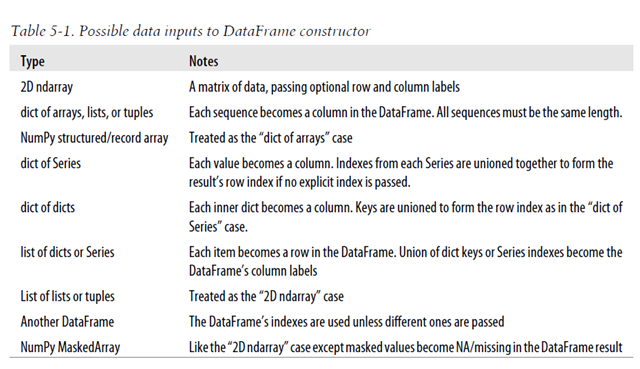

### Index Objects

In [ ]:
#pandas’s Index objects are responsible for holding the axis labels and
#other metadata (like the axis name or names). Any array or other sequence
#of labels used when constructing a Series or DataFrame
#is internally converted to an Index:

obj = pd.Series(range(3), index=['a', 'b', 'c'])
print("Type of index is",type(obj.index),"\n\n")

index = obj.index

print("Index of the object is",index)
print("Type of index of the object is ",type(index))
index[1:]

Type of index is <class 'pandas.core.indexes.base.Index'> 


Index of the object is Index(['a', 'b', 'c'], dtype='object')
Type of index of the object is  <class 'pandas.core.indexes.base.Index'>


Index(['b', 'c'], dtype='object')

In [ ]:
type(obj)

pandas.core.series.Series

In [ ]:
#Index objects are immutable and thus can’t be modified by the user:
index[1] = 'd' # TypeError

TypeError: ignored

In [ ]:
#Immutability is important so that Index objects can be safely shared among data
#structures:
labels = pd.Index(np.arange(3))
print("Index object labels is",labels)

obj2 = pd.Series([1.5, -2.5, 0], index=labels)
print(obj2)

obj2.index is labels

Index object labels is Int64Index([0, 1, 2], dtype='int64')
0    1.5
1   -2.5
2    0.0
dtype: float64


True

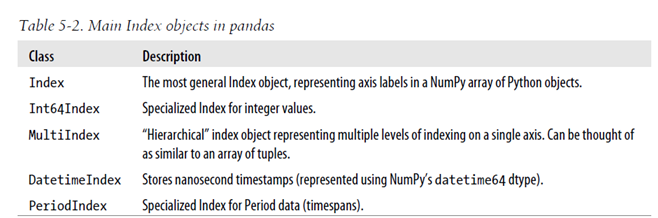

In [ ]:
# Each Index has a number of methods and properties for set logic and
#answering other common questions about the data it contains.

In [ ]:
#In addition to being array-like, an Index also functions as a fixed-size set:
print(frame3)
print(frame3.columns)
print('Ohio' in frame3.columns)
2003 in frame3.index

state  Nevada  Ohio
year               
2002      2.4   1.5
2000      2.9   3.6
2001      NaN   1.7
Index(['Nevada', 'Ohio'], dtype='object', name='state')
True


False

In [ ]:
#Unlike Python sets, a pandas Index can contain duplicate labels:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels[1]="xyz" #not allowed as index is Immutable
dup_labels

TypeError: ignored

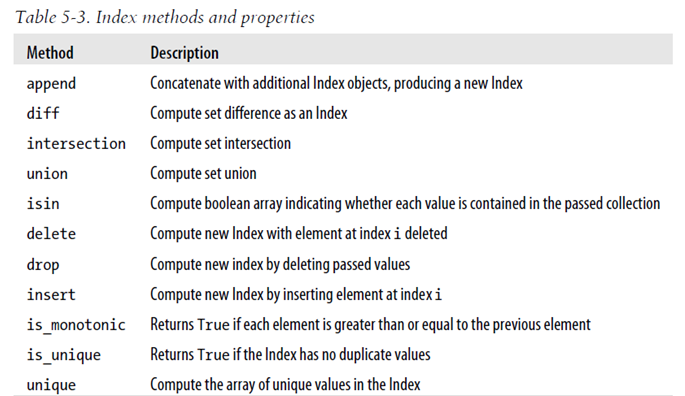

## Essential Functionality

### Reindexing

In [ ]:
import pandas as pd
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [ ]:
#An important method on pandas objects is reindex, which means to create a new
#object with the data conformed to a new index.
#Calling reindex on this Series rearranges the data according to the new index,
#introducing missing values if any index values were not already present:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [ ]:
#For ordered data like time series, it may be desirable to do some interpolation
#or filling of values when reindexing. The method option allows us to do this,
#using a method such as ffill, which forward-fills the values:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
print(obj3)
obj3.reindex(range(8))
print(obj3.reindex(range(6)))
obj3.reindex(range(6), method='ffill')

0      blue
2    purple
4    yellow
dtype: object
0      blue
1       NaN
2    purple
3       NaN
4    yellow
5       NaN
dtype: object


0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [ ]:
#With DataFrame, reindex can alter either the (row) index, columns, or both.
#When passed only a sequence, it reindexes the rows in the result

frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
print(frame)
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8


,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [ ]:
#The columns can be reindexed with the columns keyword
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


### Dropping Entries from an Axis

In [ ]:
#Dropping one or more entries from an axis is easy if you already have an
#index array or list without those entries. As that can require a bit of
#munging and set logic, the drop method will return a new object with the
#indicated value or values deleted from an axis:

#munging: the process of changing data into another format (= arrangement)
#so that it can be used or processed:
#data munging
#A lot of munging has to take place to get the data from one schema into another.

In [ ]:
import pandas as pd
import numpy as np
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
print(obj)
new_obj = obj.drop('c')
print("\n\nObj is\n",obj)
print("\n\nNew obj \n",new_obj)
obj.drop(['d', 'c'])

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64


Obj is
 a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64


New obj 
 a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64


a    0.0
b    1.0
e    4.0
dtype: float64

In [ ]:
#DataFrame, index values can be deleted from either axis.
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
#Calling drop with a sequence of labels will drop values from the row labels (axis 0):
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
#You can drop values from the columns by passing axis=1 or axis='columns':
print(data.drop('two', axis=1))
data.drop(['two', 'four'], axis='columns')

          one  three  four
Ohio        0      2     3
Colorado    4      6     7
Utah        8     10    11
New York   12     14    15


,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [ ]:
#Many functions, like drop, which modify the size or shape of a Series or DataFrame,
#can manipulate an object in-place without returning a new object:
obj.drop('c', inplace=True)
obj

#NOTE: Be careful with the inplace, as it destroys any data that is dropped.


a    0
b    1
dtype: int64

### Indexing, Selection, and Filtering

In [ ]:
#Series indexing (obj[...]) works analogously to NumPy array indexing,
#except you can use the Series’s index values instead of only integers.


In [ ]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
print(obj)
print(obj['b'])
print("Using integer",obj[1])
print(obj[2:4])


print(obj[['b', 'a', 'd']])


print(obj[[1, 3]])
obj[obj < 2]

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64
1.0
Using integer 1.0
c    2.0
d    3.0
dtype: float64
b    1.0
a    0.0
d    3.0
dtype: float64
b    1.0
d    3.0
dtype: float64


a    0.0
b    1.0
dtype: float64

In [ ]:
#Slicing with labels behaves differently than normal Python slicing in that the
#end‐point is inclusive:

obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [ ]:
#Setting using these methods modifies the corresponding section of the Series:
obj['a':'c'] = 5
obj

a    5.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [ ]:
#Indexing into a DataFrame is for retrieving one or more columns either with a
#single value or sequence:

data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data
data['two']
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [ ]:
#Indexing like this has a few special cases. First, slicing or selecting data
#with a boolean array:
print(data)
print(data[:2])
data[data['three'] > 5]

#The row selection syntax data[:2] is provided as a convenience.
#Passing a single element or a list to the [] operator selects columns.


          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7


,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
#Another use case is in indexing with a boolean DataFrame, such as one produced
#by a scalar comparison:
data < 10
data[data < 10] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,0,0,0
Utah,0,0,10,11
New York,12,13,14,15


#### Selection with loc and iloc

In [ ]:
#For DataFrame label-indexing on the rows, special indexing operators
#loc and iloc. They enable you to select a subset of the rows and columns from a
#DataFrame with NumPy-like notation using either axis labels (loc) or integers
#(iloc).

In [ ]:
print("entire data frame:\n",data,"\n\n")
# select a single row and multiple columns by label:
data.loc['Colorado', ['two', 'three']]

entire data frame:
           one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15 




two      5
three    6
Name: Colorado, dtype: int64

In [ ]:
print(data,"\n\n")

# perform some similar selections with integers using iloc:
print(data.iloc[2, [3, 0, 1]])
print(data.iloc[2])

print(data.iloc[:2,1:3])
data.iloc[[1, 2], [3, 0, 1]]

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15 


four    11
one      8
two      9
Name: Utah, dtype: int64
one       8
two       9
three    10
four     11
Name: Utah, dtype: int64
          two  three
Ohio        1      2
Colorado    5      6


,four,one,two
Colorado,7,4,5
Utah,11,8,9


In [ ]:
print(data,"\n\n")


#Both indexing functions work with slices
#in addition to single labels or lists of labels
print(data.loc[:'Utah', 'two']) #starting row till Utah; Column is only two

data.iloc[:, :3][data.three >=5]

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15 


Ohio        1
Colorado    5
Utah        9
Name: two, dtype: int64


,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


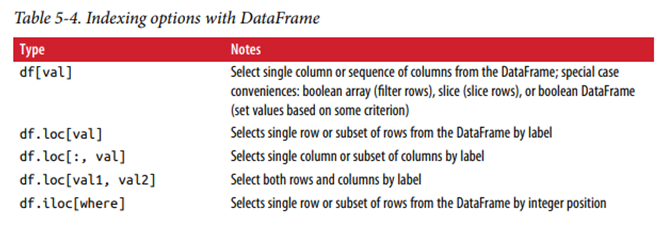

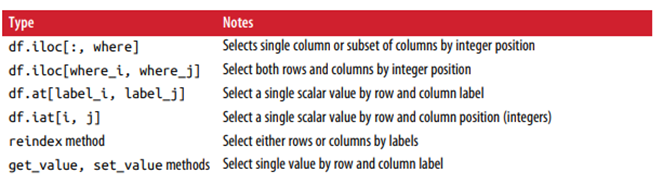

### Integer Indexes

In [ ]:
import pandas as pd
import numpy as np
ser = pd.Series(np.arange(3.))

In [ ]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [ ]:
#with a non-integer index, there is no potential for ambiguity
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

#0,1,2 are the elements and the indies are  a,b,c
ser2[-1]

2.0

In [ ]:
#if you have an axis index containing integers, data selection
#will always be label-oriented. For more precise handling,
#use loc (for labels) or iloc (for integers):
print(ser[:1])
print(ser.loc[:1])
print(ser.iloc[:1])

0    0.0
dtype: float64
0    0.0
1    1.0
dtype: float64
0    0.0
dtype: float64


### Arithmetic and Data Alignment

In [ ]:
#An important pandas feature for some applications is the behavior of arithmetic
#between objects with different indexes. When you are adding together objects,
#if any index pairs are not the same, the respective index in the
#result will be the union of the index pairs. For users with database experience,
#this is similar to an automatic outer join on the index labels.

In [ ]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

s2 = pd.Series([-2.1, 3.6, -1.5, 4.2, 3.1],index=['a', 'c', 'e', 'f', 'g'])

print("s1 is\n",s1,"\n\n")
s2

s1 is
 a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64 




a   -2.1
c    3.6
e   -1.5
f    4.2
g    3.1
dtype: float64

In [ ]:
#The internal data alignment introduces missing values in the label locations
#that don’t overlap. Missing values will then propagate
#in further arithmetic computations.
print(s1,"\n",s2)
s1 + s2

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64 
 a   -2.1
c    3.6
e   -1.5
f    4.2
g    3.1
dtype: float64


a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [ ]:
#In the case of DataFrame, alignment is performed on both rows and the columns:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(df1)
#df1
df2

            b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0


,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [ ]:
#Adding these together returns a DataFrame whose index and columns are the unions
#of the ones in each DataFrame:
df1 + df2

#Since the 'c' and 'e' columns are not found in both DataFrame objects,
#they appear as all missing in the result. The same holds for the rows
#whose labels are not common to both objects

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [ ]:
#If you add DataFrame objects with no column or row labels in common, the result
#will contain all nulls:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
print(df1)
print(df2)
df1 - df2

   A
0  1
1  2
   B
0  3
1  4


,A,B
0,NaN,NaN
1,NaN,NaN


In [ ]:
df1 = pd.DataFrame({'B': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
print(df1)
print(df2)
df1 - df2

   B
0  1
1  2
   B
0  3
1  4


,B
0,-2
1,-2


#### Arithmetic methods with fill values

In [ ]:
#In arithmetic operations between differently indexed objects, you might want to
#fill with a special value, like 0, when an axis label is found in
#one object but not the other:

In [ ]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan

#argument index isnt mentioned above; by default the row labels will be....0,1,2,...n-1
print(df1)
df2

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0


,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [ ]:
#Adding these together results in NA values in the locations that don’t overlap:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Using the add method on df1, pass df2 and an argument to fill_value:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [ ]:
print(1 / df1)
df1.rdiv(1)

#Each of them has a counterpart, starting with the letter r,
#that has arguments flipped. So these two statements are equivalent:

       a         b         c         d
0    inf  1.000000  0.500000  0.333333
1  0.250  0.200000  0.166667  0.142857
2  0.125  0.111111  0.100000  0.090909


,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [ ]:
#when reindexing a Series or DataFrame, you can also specify a different fill
#value:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


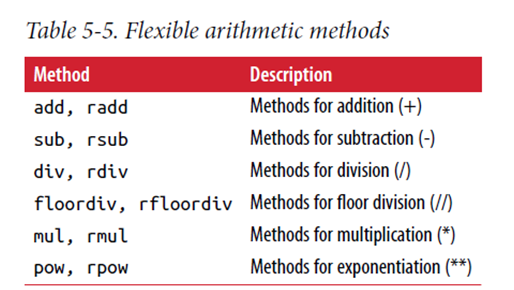

In [ ]:
# importing pandas as pd
import pandas as pd
import numpy as np
# Creating the first dataframe

df1 = pd.DataFrame({"A":[1, 1, 1, 1],
                    "B":[2, 2, 2, 2],
                    "C":[3, 3, 3, 3],
                    "D":[0, 0, 0, 0]})

# Creating the second dataframe
df2 = pd.DataFrame(np.arange(16).reshape((4, 4)),
                   columns=list('ABCD'))
print("df1\n",df1,"\n\ndf2\n",df2)
# add two dataframes
df2.loc[1, 'B'] = np.nan
print("\n",df1.add(df2))
#df2.loc[1, 'b'] = np.nan
df1.radd(df2, fill_value = 100)

df1
    A  B  C  D
0  1  2  3  0
1  1  2  3  0
2  1  2  3  0
3  1  2  3  0 

df2
     A   B   C   D
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15

     A     B   C   D
0   1   3.0   5   3
1   5   NaN   9   7
2   9  11.0  13  11
3  13  15.0  17  15


,A,B,C,D
0,1,3.0,5,3
1,5,102.0,9,7
2,9,11.0,13,11
3,13,15.0,17,15


#### Operations between DataFrame and Series

In [ ]:
#As with NumPy arrays of different dimensions, arithmetic between DataFrame and
#Series is also defined

In [ ]:
#When we subtract arr[0] from arr, the subtraction is performed once for each row.
#This is referred to as broadcasting and is explained in more detail as
#it relates to general NumPy arrays
arr = np.arange(12.).reshape((3, 4))
print(arr)
print("\n")
print(arr[0])

print("\n")
arr - arr[0]

#arr[0]-arr[0]
#arr[1]-arr[0]
#arr[2]-arr[0]



[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]


[0. 1. 2. 3.]




array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [ ]:
#Operations between a DataFrame and a Series are similar
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
print(frame)
series

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0


b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [ ]:
#arithmetic between DataFrame and Series matches the index of the Series
#on the DataFrame’s columns, broadcasting down the rows:
print(frame)
print(series)
frame - series

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64


,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [ ]:
#If an index value is not found in either the DataFrame’s columns or the Series’s index,
#the objects will be reindexed to form the union:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
print(frame)
print(series2)
frame + series2

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
b    0
e    1
f    2
dtype: int64


,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [ ]:
series3 = frame['d']
print(frame)
print(series3)

#The axis number that you pass is the axis to match on.
#In this case we mean to match on the DataFrame’s row index
#(axis='index' or axis=0) and broadcast across.

#Pandas dataframe.sub() function is used for finding the
#subtraction of dataframe and other, element-wise.
print(frame.sub(series3))
frame.sub(series3, axis='index')

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64
        Ohio  Oregon  Texas  Utah   b   d   e
Utah     NaN     NaN    NaN   NaN NaN NaN NaN
Ohio     NaN     NaN    NaN   NaN NaN NaN NaN
Texas    NaN     NaN    NaN   NaN NaN NaN NaN
Oregon   NaN     NaN    NaN   NaN NaN NaN NaN


,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### Function Application and Mapping

NumPy ufuncs (element-wise array methods) also work with pandas objects:

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(frame)
np.abs(frame)

               b         d         e
Utah   -0.204708  0.478943 -0.519439
Ohio   -0.555730  1.965781  1.393406
Texas   0.092908  0.281746  0.769023
Oregon  1.246435  1.007189 -1.296221


,b,d,e
Utah,0.204708,0.478943,0.519439
Ohio,0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,1.296221


In [ ]:
#Another frequent operation is applying a function on one-dimensional arrays
#to each column or row. DataFrame’s apply method does exactly this
f = lambda x: x.max() - x.min()
print(frame)
frame.apply(f)

#Here the function f, which computes the difference between the maximum and
#minimum of a Series, is invoked once on each column in frame.
#The result is a Series having the columns of frame as its index.

     b  a    c
0  4.3  0 -2.0
1  7.0  1  5.0
2 -3.0  0  8.0
3  2.0  1 -2.5


b    10.0
a     1.0
c    10.5
dtype: float64

In [ ]:
#If you pass axis='columns' to apply, the function will be invoked once per row
#instead:
frame.apply(f, axis='columns')

0     6.3
1     6.0
2    11.0
3     4.5
dtype: float64

Many of the most common array statistics (like sum and mean) are DataFrame methods, so using apply is not necessary.
The function passed to apply need not return a scalar value; it can also return a Series with multiple values:

In [ ]:
#The function passed to apply need not return a scalar value;
#it can also return a Series with multiple values:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,a,c
min,-3.0,0,-2.5
max,7.0,1,8.0


In [ ]:
#Element-wise Python functions can be used, too. Suppose you wanted to compute a
#formatted string from each floating-point value in frame.
#You can do this with apply map:
print(frame)
format = lambda x: '%.20f' % x
frame.applymap(format)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0


,b,d,e
Utah,0.00000000000000000000,1.00000000000000000000,2.00000000000000000000
Ohio,3.00000000000000000000,4.00000000000000000000,5.00000000000000000000
Texas,6.00000000000000000000,7.00000000000000000000,8.00000000000000000000
Oregon,9.00000000000000000000,10.00000000000000000000,11.00000000000000000000


In [ ]:
#The reason for the name applymap is that Series has a map method for applying
#an element-wise function:
frame['e'].map(format)

Utah      -0.51943871505673810951
Ohio       1.39340583297299036580
Texas      0.76902256761183873657
Oregon    -1.29622110911226351426
Name: e, dtype: object

### Sorting and Ranking

In [ ]:
#Sorting a dataset by some criterion is another important built-in operation.
#To sort lexicographically by row or column index, use the sort_index method,
#which returns a new, sorted object:
obj = pd.Series(range(4), index=['ad', 'aa', 'ba', 'bc'])
print(obj)
obj.sort_index()

ad    0
aa    1
ba    2
bc    3
dtype: int64


aa    1
ad    0
ba    2
bc    3
dtype: int64

In [ ]:
#With a DataFrame, you can sort by index on either axis:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
print(frame)
print("\n\nSorting based on index")
print(frame.sort_index())

print("\n\nBased on column labels")
frame.sort_index(axis=1)

       d  a  b  c
three  0  1  2  3
one    4  5  6  7


Sorting based on index
       d  a  b  c
one    4  5  6  7
three  0  1  2  3


Based on column labels


,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [ ]:
#The data is sorted in ascending order by default,
#but can be sorted in descending order, too:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [ ]:
#To sort a Series by its values, use its sort_values method:
obj = pd.Series([4, 7, -3, 2])
print(obj,"\n")
obj.sort_values()

0    4
1    7
2   -3
3    2
dtype: int64 



2   -3
3    2
0    4
1    7
dtype: int64

In [ ]:
#Any missing values are sorted to the end of the Series by default:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [ ]:
#When sorting a DataFrame, you can use the data in one or more columns as the sort
#keys. To do so, pass one or more column names to the by option of sort_values:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
print(frame)
frame.sort_values(by='b')

   b  a
0  4  0
1  7  1
2 -3  0
3  2  1


,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [ ]:
#To sort by multiple columns, pass a list of names:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [ ]:
#Ranking assigns ranks from one through the number of valid data points
#in an array. The rank methods for Series and DataFrame are the place to look;
#by default rank breaks ties by assigning each group the mean rank:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [ ]:
#Ranks can also be assigned according to the order in which they’re
#observed in the data:
obj.rank(method='first')

#Here, instead of using the average rank 6.5 for the entries 0 and 2, they
#instead have been set to 6 and 7 because label 0 precedes label 2 in the data.

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [ ]:
#You can rank in descending order, too:
# Assign tie values the maximum rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [ ]:
#DataFrame can compute ranks over the rows or the columns:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


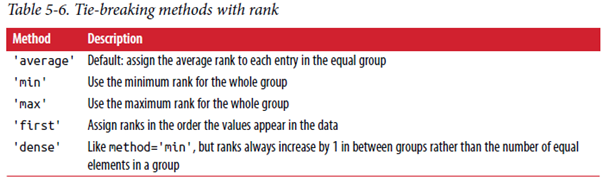

### Axis Indexes with Duplicate Labels

Up until now all of the examples we’ve looked at have had unique axis labels (index values). While many pandas functions (like reindex) require that the labels be unique, it’s not mandatory.

In [ ]:
#Let’s consider a small Series with duplicate indices:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [ ]:
#The index’s is_unique property can tell you whether its labels are
#unique or not:
obj.index.is_unique

True

In [ ]:
#Data selection is one of the main things that behaves differently with duplicates.
#Indexing a label with multiple entries returns a Series, while single entries
#return a scalar value:
print(obj['a'])
obj['c']

a    0
a    1
dtype: int64


4

In [ ]:
#This can make your code more complicated, as the output type from indexing can
#vary based on whether a label is repeated or not.

#The same logic extends to indexing rows in a DataFrame:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
print(df)
df.loc['b']

          0         1         2
a -0.474470  0.709844  1.400729
a -0.528264  0.397774  0.786729
b  0.954898 -0.484137 -1.408107
b  1.018143 -1.654873  0.717973


,0,1,2
b,0.954898,-0.484137,-1.408107
b,1.018143,-1.654873,0.717973


## Summarizing and Computing Descriptive Statistics

pandas objects are equipped with a set of common mathematical and statistical methods. Most of these fall into the category of reductions or summary statistics, methods that extract a single value (like the sum or mean) from a Series or a Series of values from the rows or columns of a DataFrame. Compared with the similar methods found on NumPy arrays, they have built-in handling for missing data.

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [ ]:
#Calling DataFrame’s sum method returns a Series containing column sums:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [ ]:
#Passing axis='columns' or axis=1 sums across the columns instead:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [ ]:
#NA values are excluded unless the entire slice (row or column in this case)
#is NA. This can be disabled with the skipna option:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

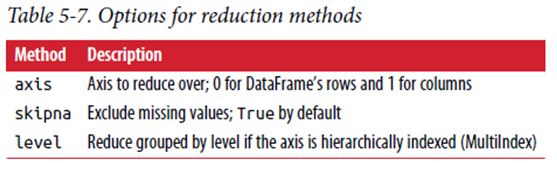

In [ ]:
#Some methods, like idxmin and idxmax, return indirect statistics
#like the index value where the min or max values are attained:
print(df)
df.idxmax()

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3


one    b
two    d
dtype: object

In [ ]:
#Other methods are accumulations:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [ ]:
#Another type of method is neither a reduction nor an accumulation.
#describe is one such example, producing multiple summary statistics in one shot:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [ ]:
#On non-numeric data, describe produces alternative summary statistics
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
print(obj)
obj.describe()

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object


count     16
unique     3
top        a
freq       8
dtype: object

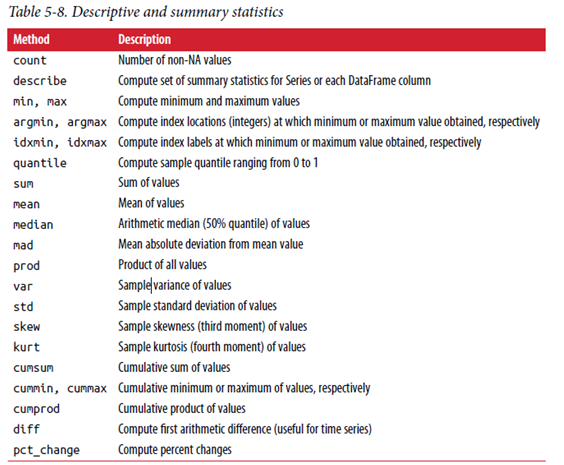

### Correlation and Covariance

“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.

Some summary statistics, like correlation and covariance, are computed from pairs of arguments. Let’s consider some DataFrames of stock prices and volumes obtained from Yahoo! Finance using the add-on pandas-datareader package.

conda install pandas-datareader

In [ ]:
#price = pd.read_pickle('examples/yahoo_price.pkl')
#volume = pd.read_pickle('examples/yahoo_volume.pkl')

use the pandas_datareader module to download some data for a few stock tickers

import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

In [ ]:
#compute percent changes of the prices, a time series operation
returns = price.pct_change()
returns.tail()

In [ ]:
#The corr method of Series computes the correlation of the overlapping, non-NA,
#aligned-by-index values in two Series. Relatedly, cov computes the covariance:
returns['MSFT'].corr(returns['IBM'])
returns['MSFT'].cov(returns['IBM'])

In [ ]:
#Since MSFT is a valid Python attribute, we can also select these columns
#using more concise syntax:
returns.MSFT.corr(returns.IBM)

In [ ]:
#DataFrame’s corr and cov methods, on the other hand, return a full correlation or
#covariance matrix as a DataFrame, respectively:
returns.corr()
returns.cov()

In [ ]:
#Using DataFrame’s corrwith method, you can compute pairwise correlations
#between a DataFrame’s columns or rows with another Series or DataFrame.
#Passing a Series returns a Series with the correlation value computed for
#each column:
returns.corrwith(returns.IBM)

In [ ]:
#Passing a DataFrame computes the correlations of matching column names.
#compute correlations of percent changes with volume:
returns.corrwith(volume)

#Passing axis='columns' does things row-by-row instead.
#In all cases, the data points are aligned by label before correlation is computed.

### Unique Values, Value Counts, and Membership

Another class of related methods extracts information about the values contained in a one-dimensional Series.

In [ ]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [ ]:
#The first function is unique, which gives you an array of the unique values
#in a Series:
uniques = obj.unique()
uniques


#The unique values are not necessarily returned in sorted order,
#but could be sorted after the fact if needed (uniques.sort()).


array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
##Relatedly, value_counts computes a Series containing value frequencies:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [ ]:
#The Series is sorted by value in descending order as a convenience.
#value_counts is also available as a top-level pandas method that can be used
#with any array or sequence:
pd.value_counts(obj.values, sort=False)

c    3
d    1
a    3
b    2
dtype: int64

In [ ]:
#isin performs a vectorized set membership check and can be useful in filtering a
#dataset down to a subset of values in a Series or column in a DataFrame:
obj
mask = obj.isin(['b', 'c'])
print(mask)
obj[mask]

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool


0    c
5    b
6    b
7    c
8    c
dtype: object

In [ ]:
#Related to isin is the Index.get_indexer method, which gives you an index array
#from an array of possibly non-distinct values into another array of distinct values:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

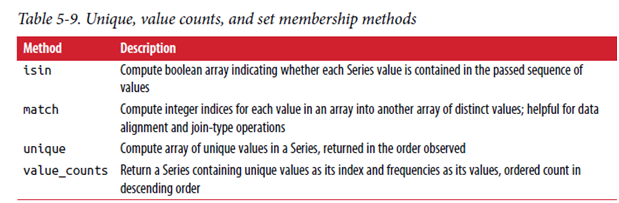

In [ ]:
#to compute a histogram on multiple related columns in
#a DataFrame. Here’s an example:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
#Passing pandas.value_counts to this DataFrame’s apply function gives:
print(data)
result = data.apply(pd.value_counts).fillna(0)
result

#Here, the row labels in the result are the distinct values occurring in
#all of the columns. The values are the respective counts of these values in each column.

   Qu1  Qu2  Qu3
0    1    2    1
1    3    3    5
2    4    1    2
3    3    2    4
4    4    3    4


,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0
